<a href="https://www.kaggle.com/code/shubhamgupta012/eda-and-visualization-on-data?scriptVersionId=134156249" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-employee-dataset/company_employee_details.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/company-employee-dataset/company_employee_details.csv')
df.head()

,Unnamed: 0,company,department,employee_id,age,age_when_joined,years_in_the_company,salary,annual_bonus,prior_years_experience,full_time,part_time,contractor
0,0,Glasses,BigData,16,41,38,3,68074.971354,17664.104103,3,0.000000,0.000000,1.000000
1,1,Glasses,AI,56,44,42,2,49092.147458,21551.141079,2,0.000000,0.184991,1.000000
2,2,Cheerper,Support,59,41,40,1,40000.000000,23698.878851,2,0.000000,0.919887,0.662706
3,3,Glasses,Design,40,39,32,7,108192.465506,21570.929657,1,0.930396,0.546206,0.000000
4,4,Glasses,Search Engine,47,30,22,9,71291.191132,21565.505715,2,0.525432,0.938412,0.000000


In [4]:
df.shape

(5000, 13)

In [5]:
df.describe()

,Unnamed: 0,employee_id,age,age_when_joined,years_in_the_company,salary,annual_bonus,prior_years_experience,full_time,part_time,contractor
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,30.608400,38.131800,33.504600,4.662000,87169.773408,18602.668196,2.497600,0.375924,0.387252,0.384871
std,1443.520003,22.867375,6.040143,7.767165,2.547755,28387.516846,4412.142023,1.206103,0.338760,0.341085,0.339714
min,0.000000,1.000000,30.000000,22.000000,1.000000,40000.000000,9000.000000,1.000000,0.000000,0.000000,0.000000
25%,1249.750000,10.000000,33.000000,27.000000,3.000000,66068.490326,15412.930670,1.000000,0.009784,0.022684,0.017663
50%,2499.500000,29.000000,38.000000,33.000000,5.000000,86633.575487,18786.655969,2.000000,0.320972,0.336440,0.343933
75%,3749.250000,47.000000,43.000000,39.000000,7.000000,107154.507707,22282.508900,3.000000,0.642782,0.659128,0.648790
max,4999.000000,80.000000,49.000000,48.000000,9.000000,153000.000000,24792.910000,5.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   company                 5000 non-null   object 
 2   department              5000 non-null   object 
 3   employee_id             5000 non-null   int64  
 4   age                     5000 non-null   int64  
 5   age_when_joined         5000 non-null   int64  
 6   years_in_the_company    5000 non-null   int64  
 7   salary                  5000 non-null   float64
 8   annual_bonus            5000 non-null   float64
 9   prior_years_experience  5000 non-null   int64  
 10  full_time               5000 non-null   float64
 11  part_time               5000 non-null   float64
 12  contractor              5000 non-null   float64
dtypes: float64(5), int64(6), object(2)
memory usage: 507.9+ KB


In [7]:
df.dtypes

Unnamed: 0                  int64
company                    object
department                 object
employee_id                 int64
age                         int64
age_when_joined             int64
years_in_the_company        int64
salary                    float64
annual_bonus              float64
prior_years_experience      int64
full_time                 float64
part_time                 float64
contractor                float64
dtype: object

In [8]:
df.isnull().sum()

Unnamed: 0                0
company                   0
department                0
employee_id               0
age                       0
age_when_joined           0
years_in_the_company      0
salary                    0
annual_bonus              0
prior_years_experience    0
full_time                 0
part_time                 0
contractor                0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['company'].value_counts()

Glasses     2369
Cheerper    1440
Pear        1191
Name: company, dtype: int64

In [11]:
df['department'].value_counts()

AI               1128
Search Engine    1071
BigData           797
Design            720
Sales             653
Support           631
Name: department, dtype: int64

In [12]:
df['prior_years_experience'].value_counts()

2    1341
1    1289
3    1278
4     777
5     315
Name: prior_years_experience, dtype: int64

Text(0.5, 1.0, 'Various Company in which Employee works')

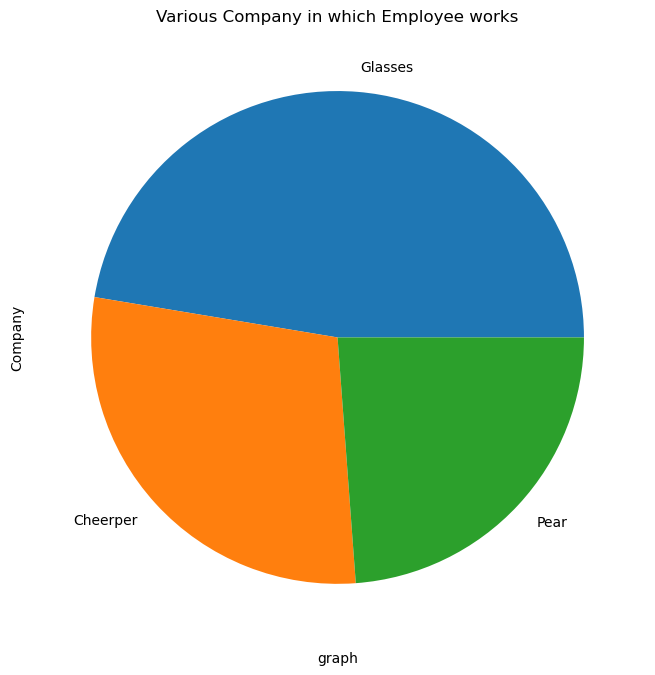

In [13]:
plt.figure(figsize=(20,8))
df['company'].value_counts().plot.pie()
plt.ylabel('Company')
plt.xlabel('graph')
plt.title('Various Company in which Employee works')

Text(0.5, 1.0, 'Various Department in which Employee works')

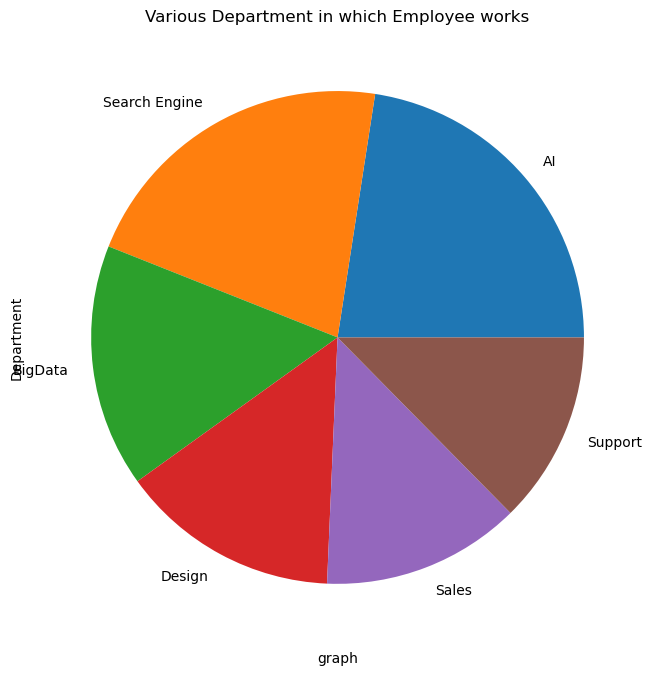

In [14]:
plt.figure(figsize=(20,8))
df['department'].value_counts().plot.pie()
plt.ylabel('Department')
plt.xlabel('graph')
plt.title('Various Department in which Employee works')

Text(0.5, 1.0, 'Years of Prior Experience')

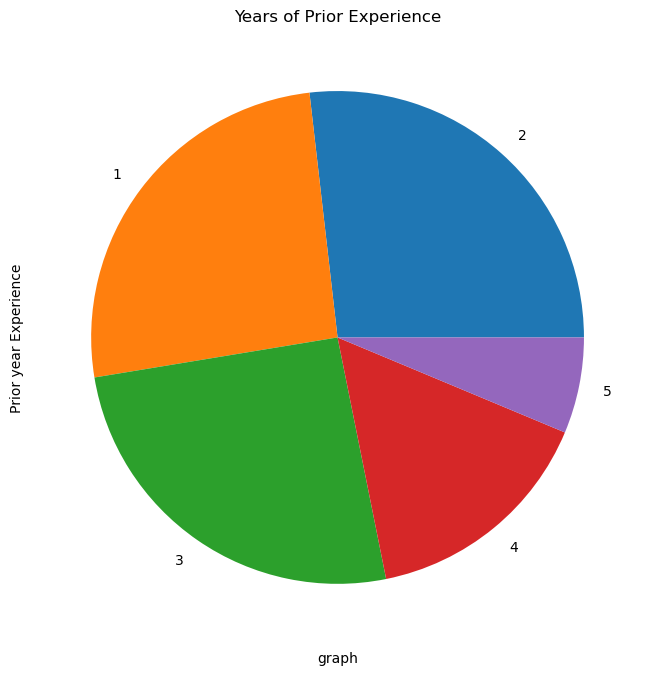

In [15]:
plt.figure(figsize=(20,8))
df['prior_years_experience'].value_counts().plot.pie()
plt.ylabel('Prior year Experience')
plt.xlabel('graph')
plt.title('Years of Prior Experience')

In [16]:
import seaborn as sns

Text(0.5, 1.0, 'Histogram of Age when joined')

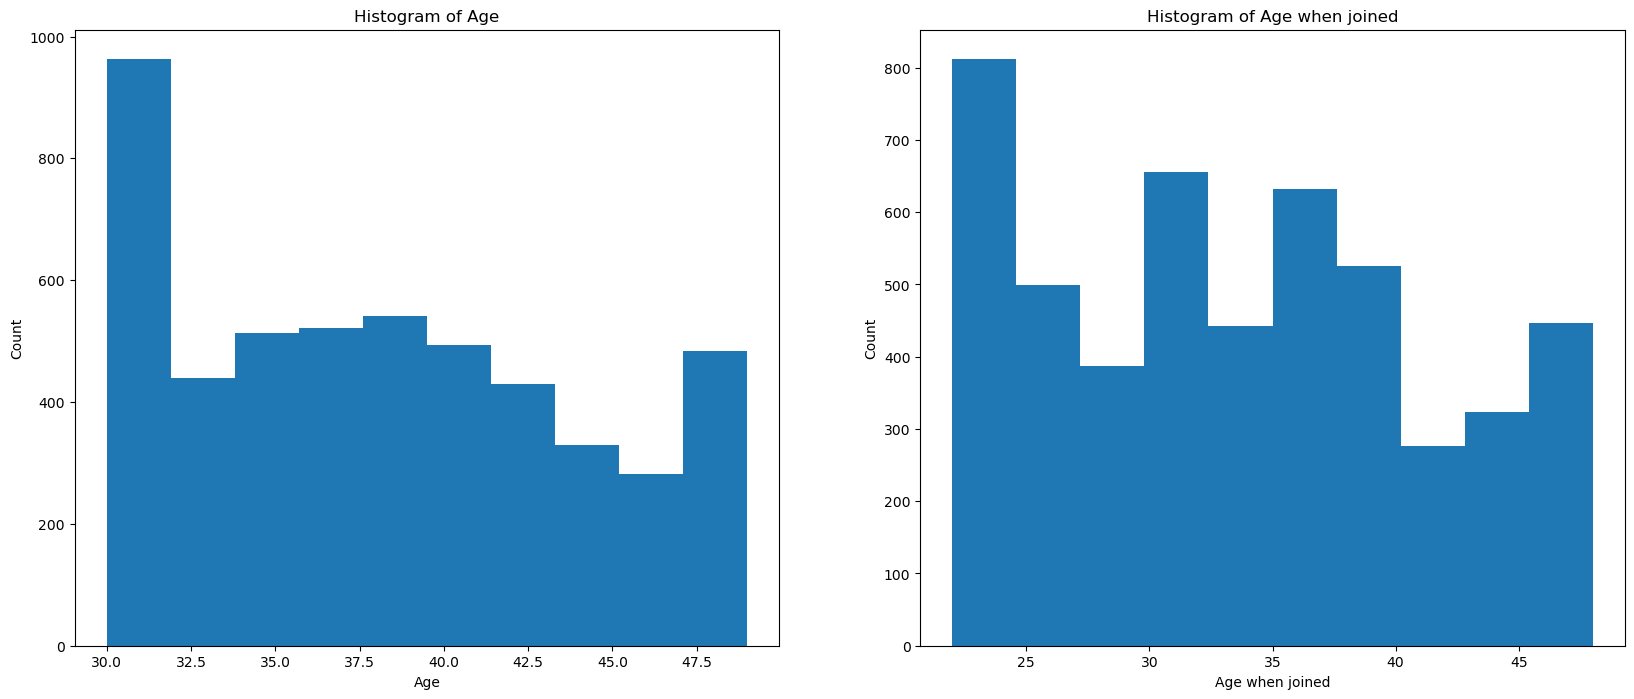

In [17]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.subplot(1,2,2)
plt.hist(df['age_when_joined'])
plt.xlabel('Age when joined')
plt.ylabel('Count')
plt.title('Histogram of Age when joined')

Text(0.5, 1.0, 'Histogram of contractor or not')

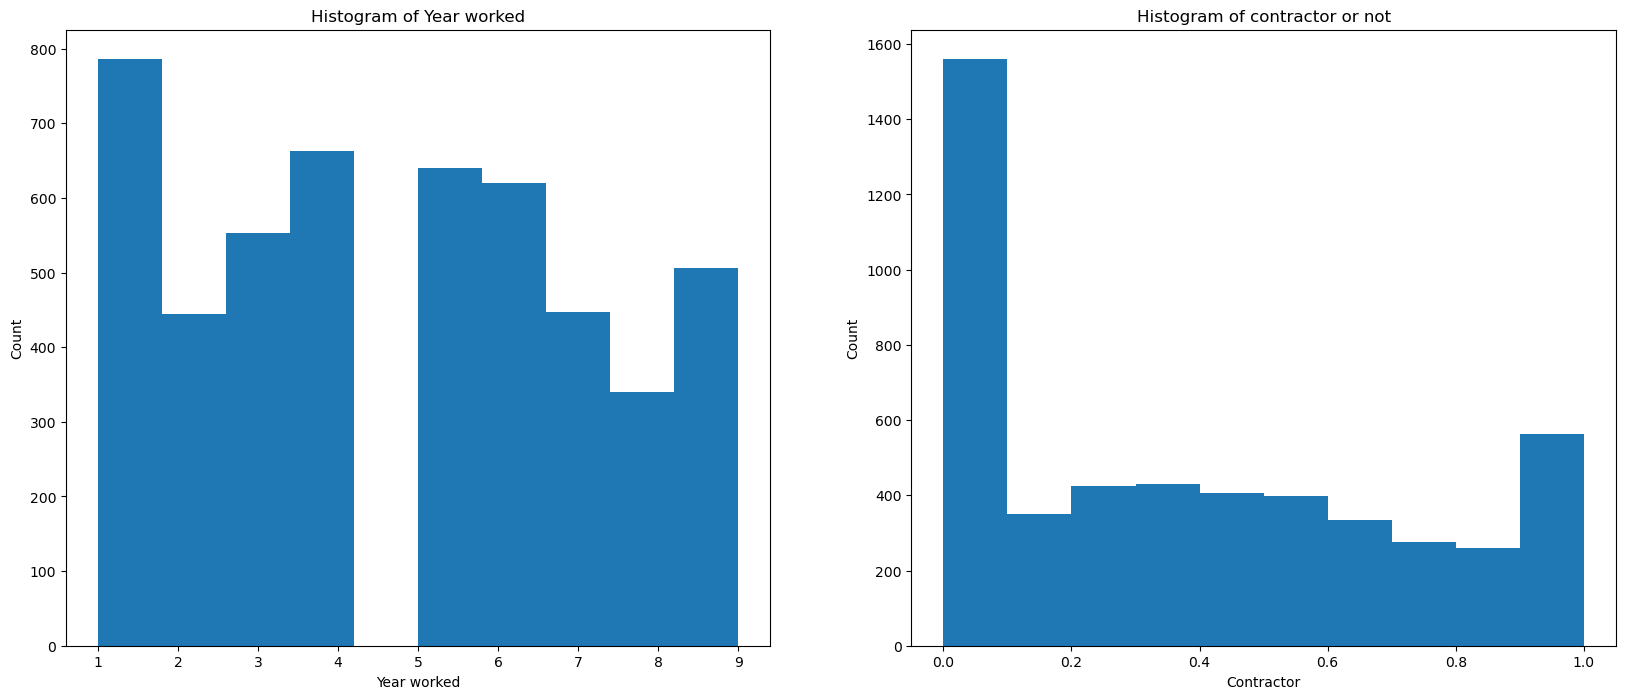

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['years_in_the_company'])
plt.xlabel('Year worked')
plt.ylabel('Count')
plt.title('Histogram of Year worked')
plt.subplot(1,2,2)
plt.hist(df['contractor'])
plt.xlabel('Contractor')
plt.ylabel('Count')
plt.title('Histogram of contractor or not')

Text(0.5, 1.0, 'Histogram of Annual Bonus received')

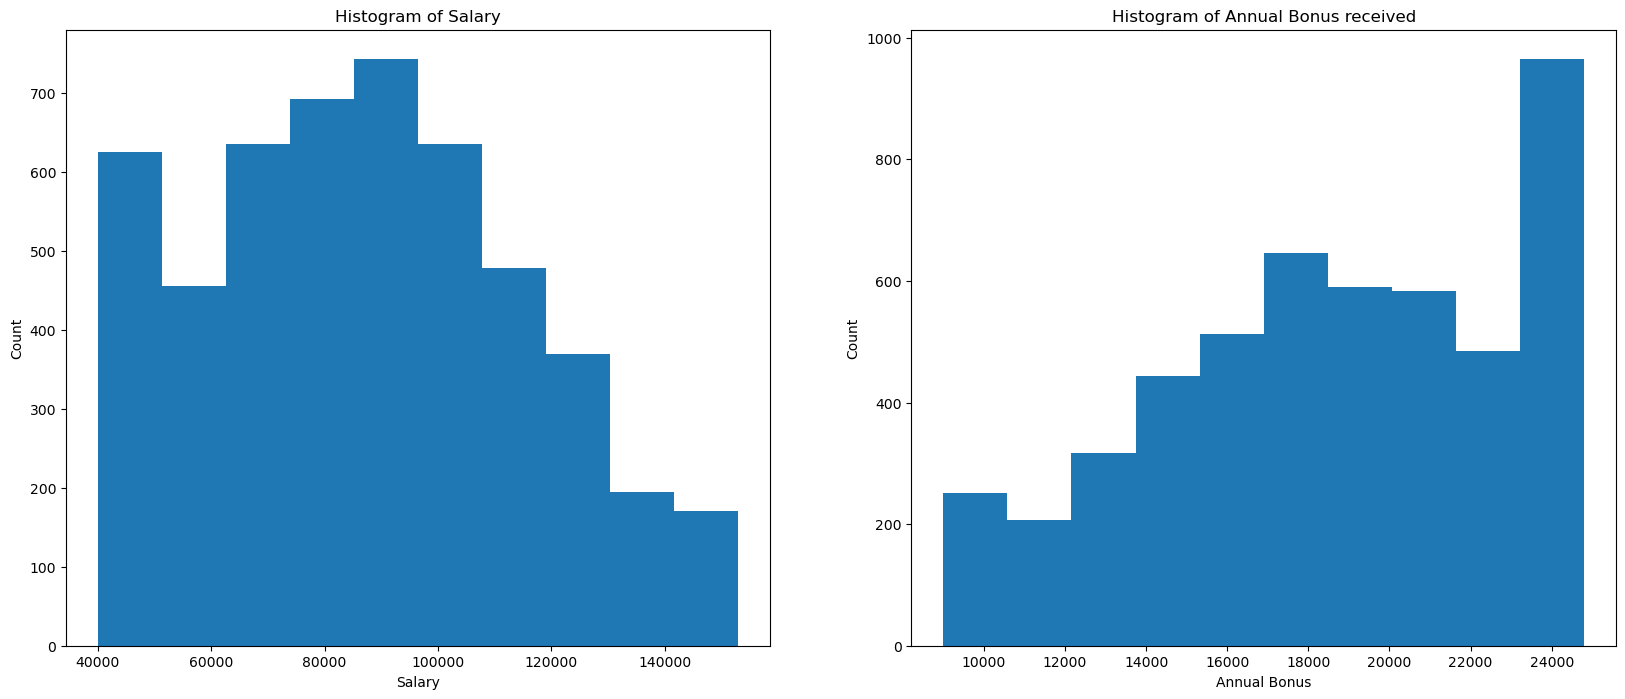

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['salary'])
plt.xlabel('Salary')
plt.ylabel('Count')
plt.title('Histogram of Salary')
plt.subplot(1,2,2)
plt.hist(df['annual_bonus'])
plt.xlabel('Annual Bonus')
plt.ylabel('Count')
plt.title('Histogram of Annual Bonus received')

Text(0.5, 1.0, 'Histogram of Part Time Employee')

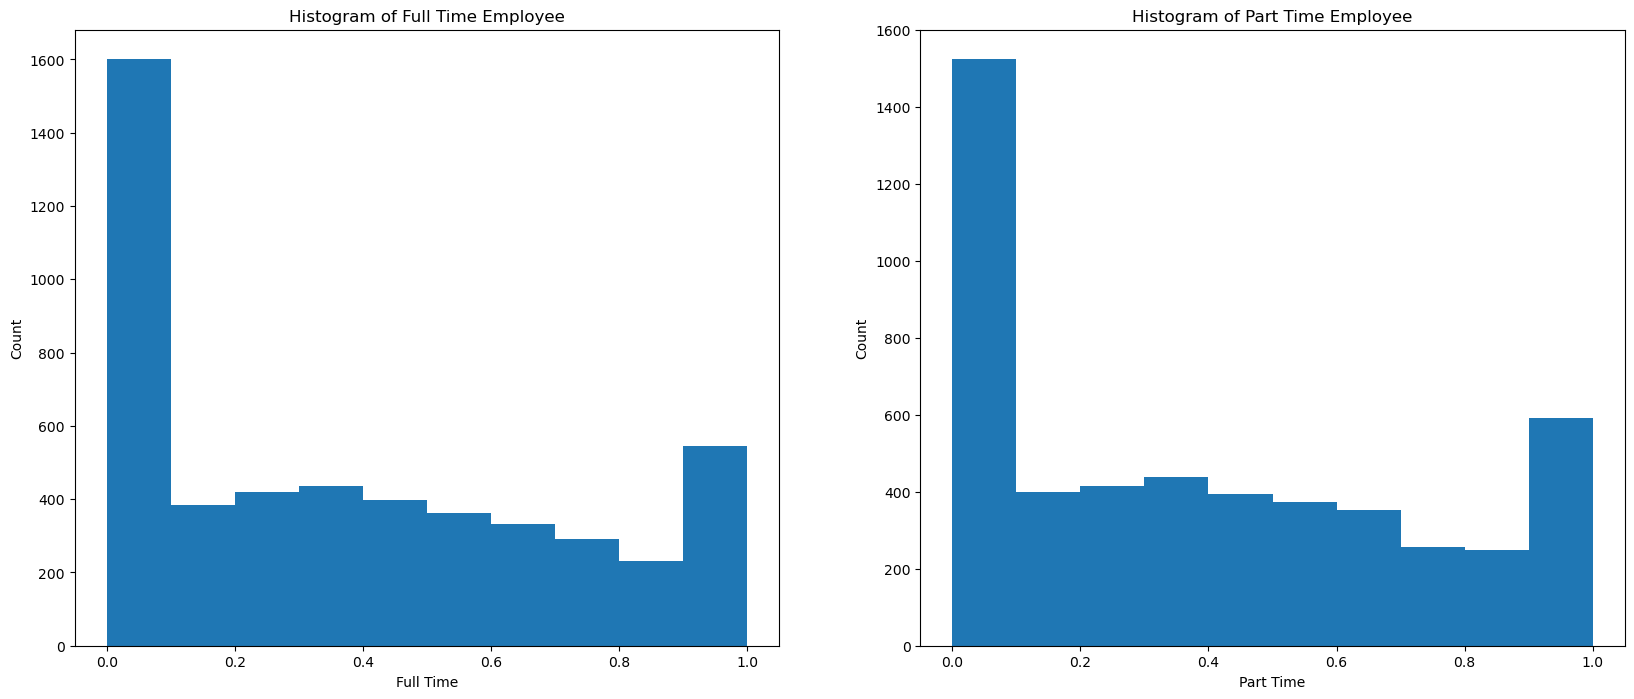

In [20]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['full_time'])
plt.xlabel('Full Time')
plt.ylabel('Count')
plt.title('Histogram of Full Time Employee')
plt.subplot(1,2,2)
plt.hist(df['part_time'])
plt.xlabel('Part Time')
plt.ylabel('Count')
plt.title('Histogram of Part Time Employee')

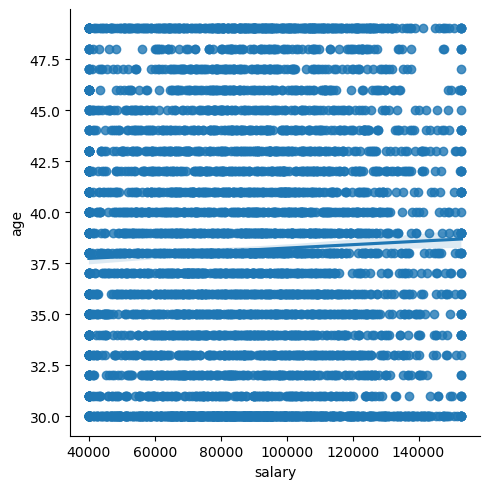

In [21]:
sns.lmplot(data=df, x="salary", y="age")

In [22]:
df['employment_type'] = df[['full_time', 'part_time', 'contractor']].idxmax(axis=1).str.upper()

In [23]:
df.head()

,Unnamed: 0,company,department,employee_id,age,age_when_joined,years_in_the_company,salary,annual_bonus,prior_years_experience,full_time,part_time,contractor,employment_type
0,0,Glasses,BigData,16,41,38,3,68074.971354,17664.104103,3,0.000000,0.000000,1.000000,CONTRACTOR
1,1,Glasses,AI,56,44,42,2,49092.147458,21551.141079,2,0.000000,0.184991,1.000000,CONTRACTOR
2,2,Cheerper,Support,59,41,40,1,40000.000000,23698.878851,2,0.000000,0.919887,0.662706,PART_TIME
3,3,Glasses,Design,40,39,32,7,108192.465506,21570.929657,1,0.930396,0.546206,0.000000,FULL_TIME
4,4,Glasses,Search Engine,47,30,22,9,71291.191132,21565.505715,2,0.525432,0.938412,0.000000,PART_TIME


In [24]:
df['employment_type'].value_counts()

CONTRACTOR    1693
PART_TIME     1677
FULL_TIME     1630
Name: employment_type, dtype: int64

<Axes: ylabel='employment_type'>

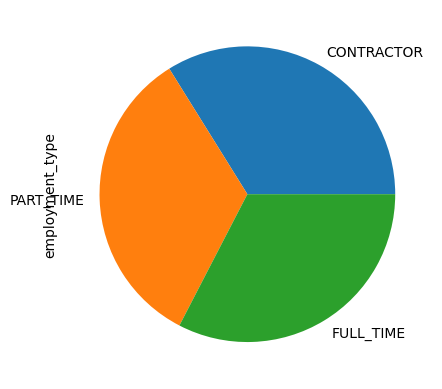

In [25]:
df['employment_type'].value_counts().plot.pie()

<Axes: xlabel='years_in_the_company', ylabel='count'>

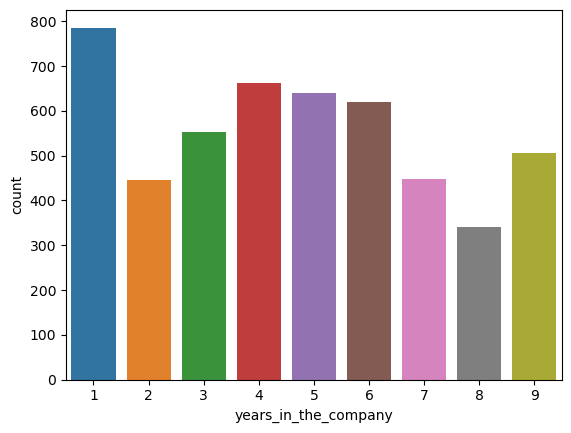

In [26]:
sns.countplot(data=df, x="years_in_the_company")

<Axes: xlabel='employment_type', ylabel='count'>

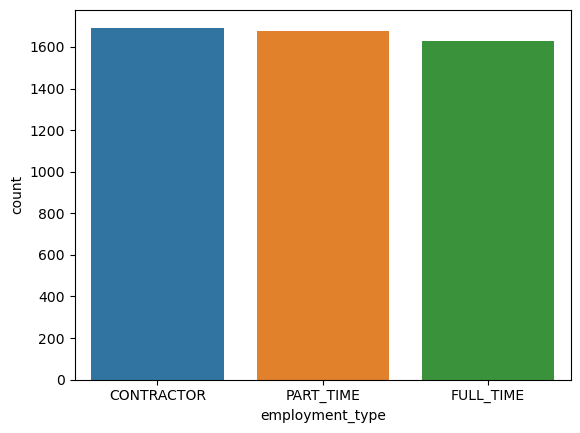

In [27]:
sns.countplot(data=df,x='employment_type')

<Axes: xlabel='department', ylabel='count'>

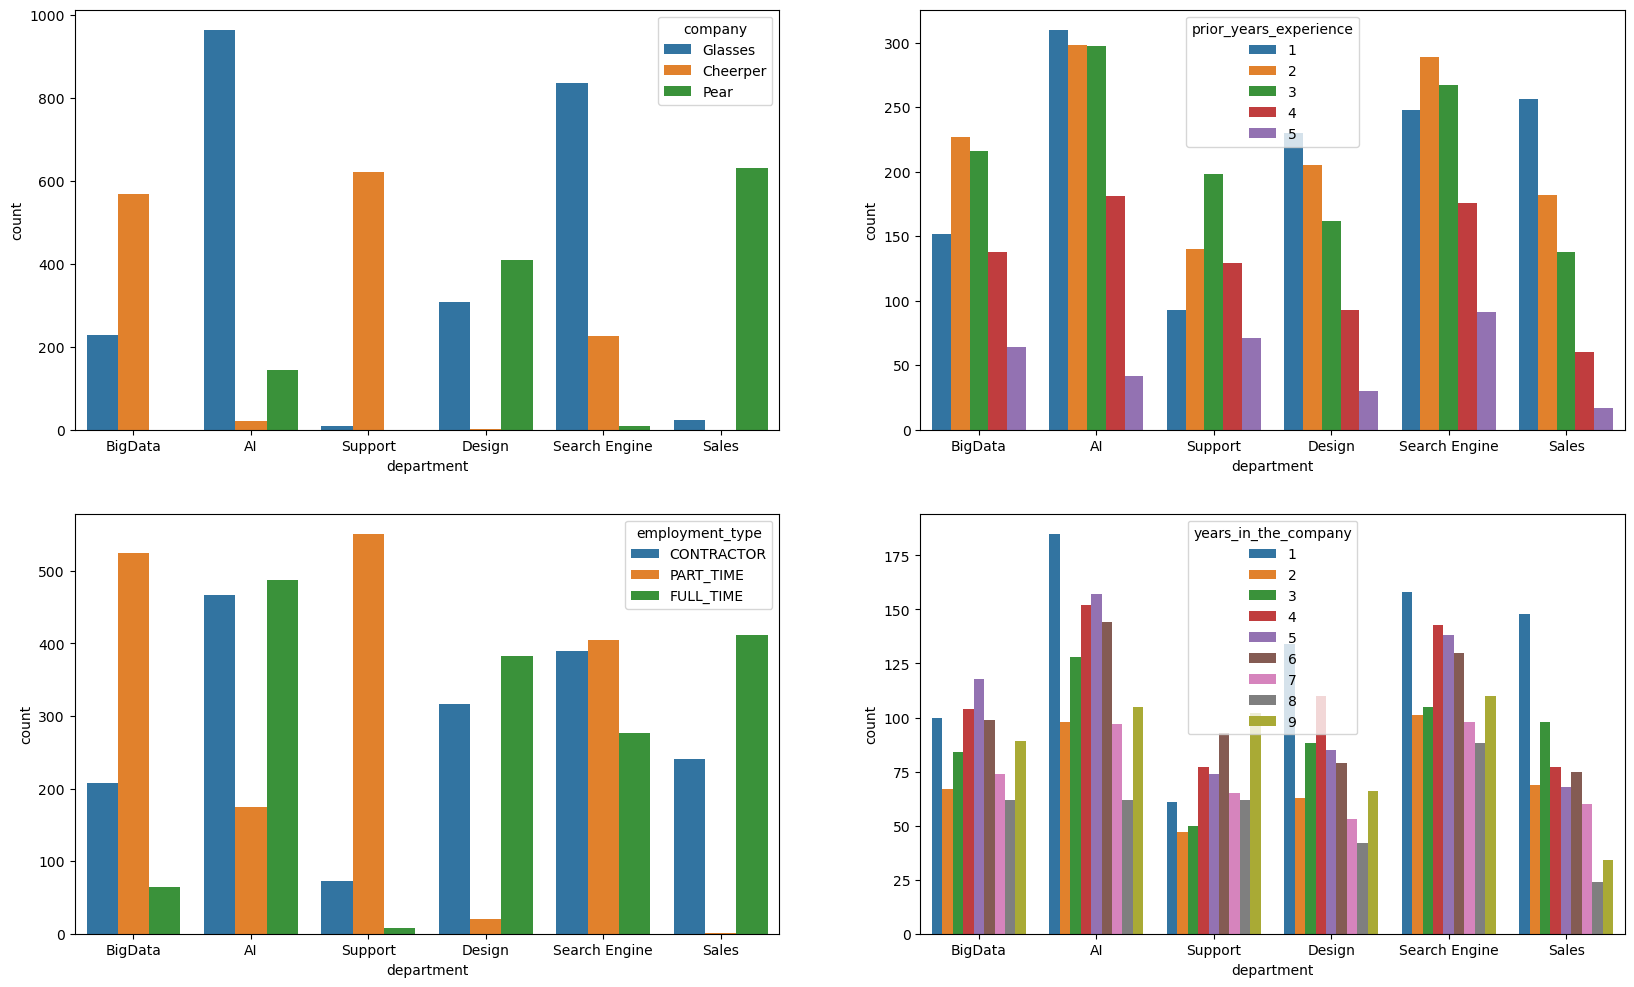

In [28]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(data=df, x="department",hue='company')
plt.subplot(2,2,2)
sns.countplot(data=df, x="department",hue='prior_years_experience')
plt.subplot(2,2,3)
sns.countplot(data=df, x="department",hue='employment_type')
plt.subplot(2,2,4)
sns.countplot(data=df, x="department",hue='years_in_the_company')

<Axes: xlabel='company', ylabel='count'>

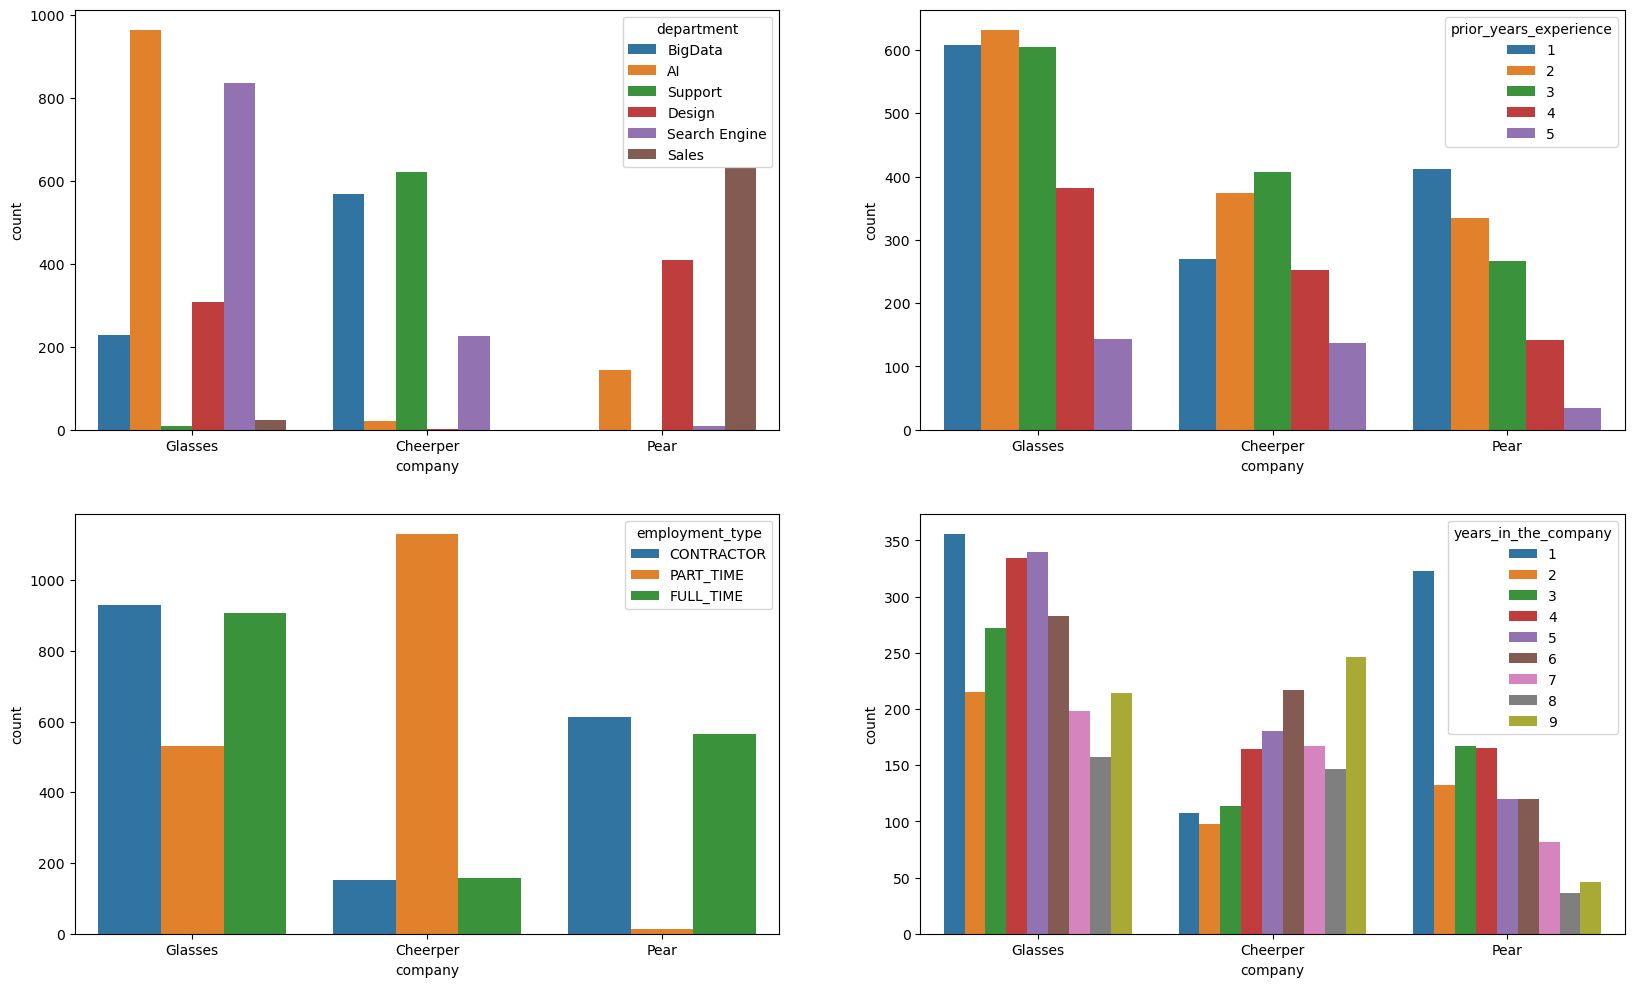

In [29]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(data=df, x="company",hue='department')
plt.subplot(2,2,2)
sns.countplot(data=df, x="company",hue='prior_years_experience')
plt.subplot(2,2,3)
sns.countplot(data=df, x="company",hue='employment_type')
plt.subplot(2,2,4)
sns.countplot(data=df, x="company",hue='years_in_the_company')

<Axes: xlabel='employment_type', ylabel='count'>

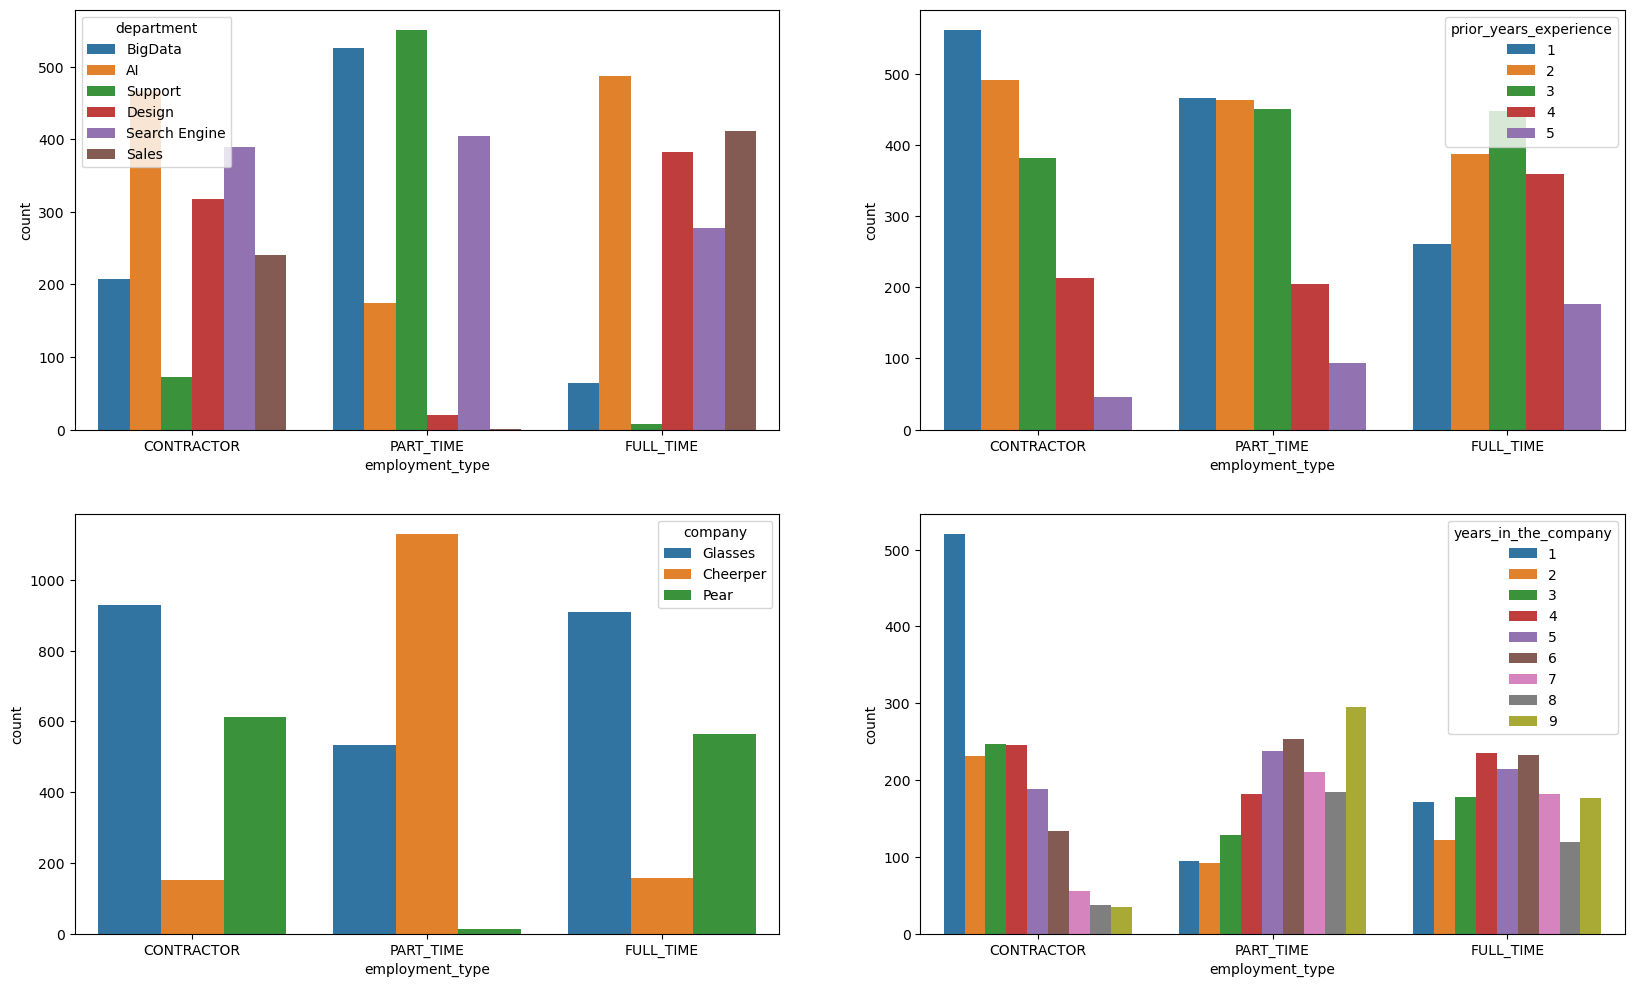

In [30]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(data=df, x="employment_type",hue='department')
plt.subplot(2,2,2)
sns.countplot(data=df, x="employment_type",hue='prior_years_experience')
plt.subplot(2,2,3)
sns.countplot(data=df, x="employment_type",hue='company')
plt.subplot(2,2,4)
sns.countplot(data=df, x="employment_type",hue='years_in_the_company')

<Axes: xlabel='prior_years_experience', ylabel='count'>

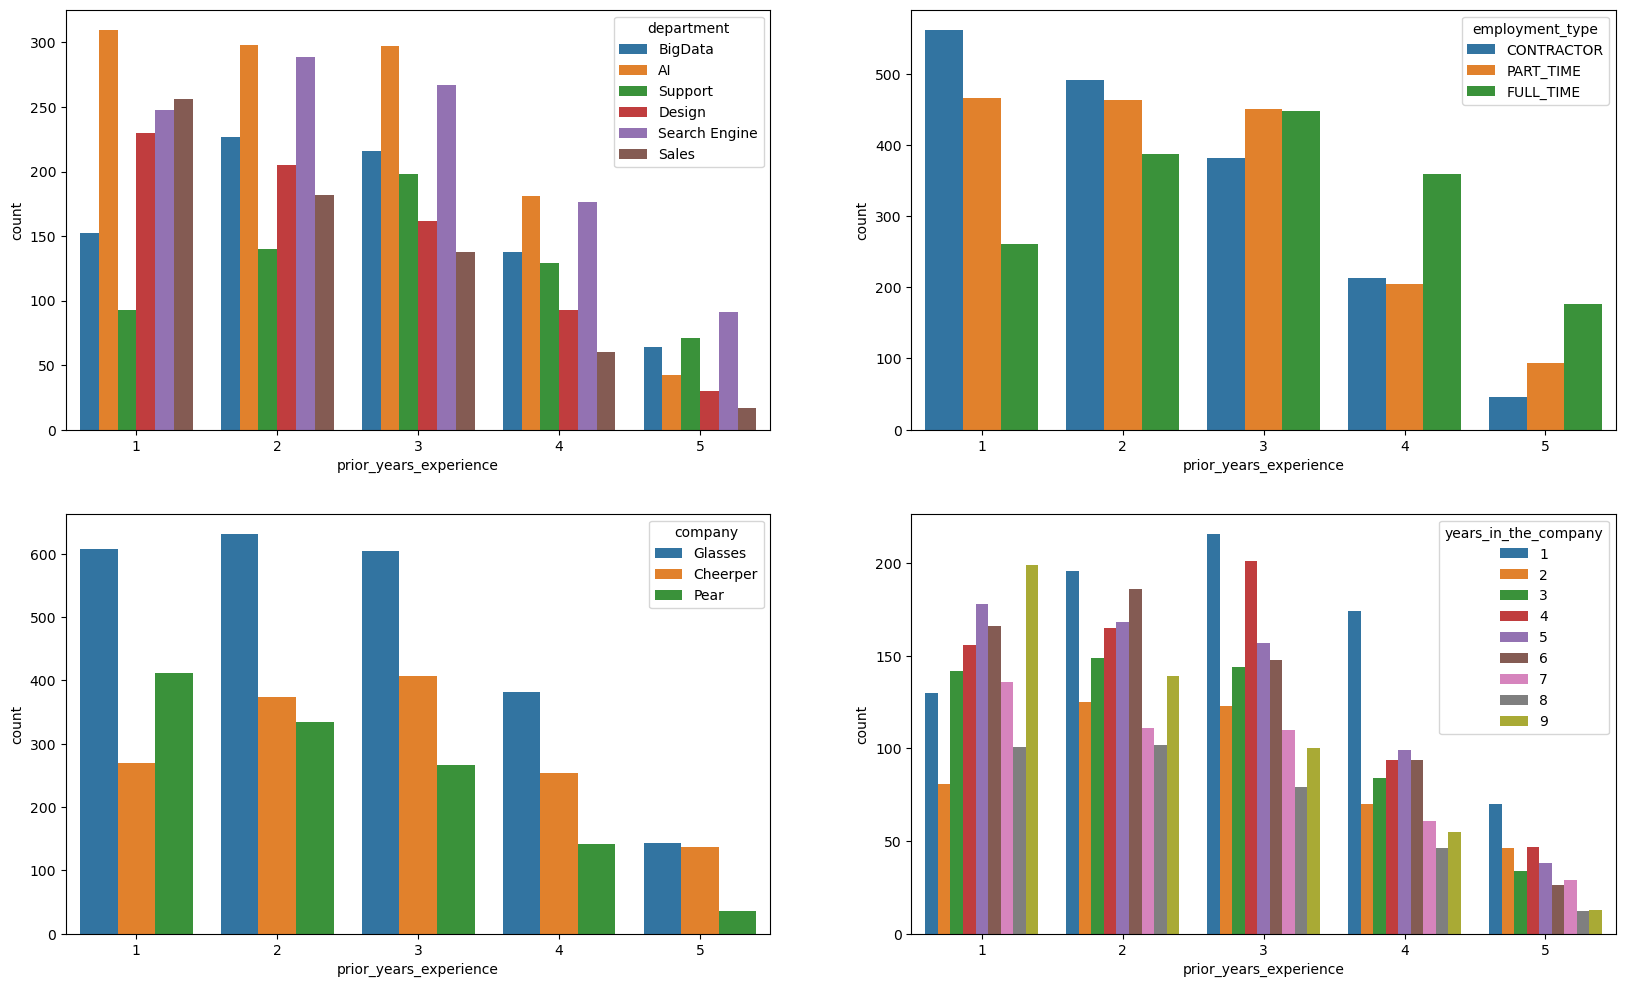

In [31]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(data=df, x="prior_years_experience",hue='department')
plt.subplot(2,2,2)
sns.countplot(data=df, x="prior_years_experience",hue='employment_type')
plt.subplot(2,2,3)
sns.countplot(data=df, x="prior_years_experience",hue='company')
plt.subplot(2,2,4)
sns.countplot(data=df, x="prior_years_experience",hue='years_in_the_company')

<Axes: xlabel='years_in_the_company', ylabel='count'>

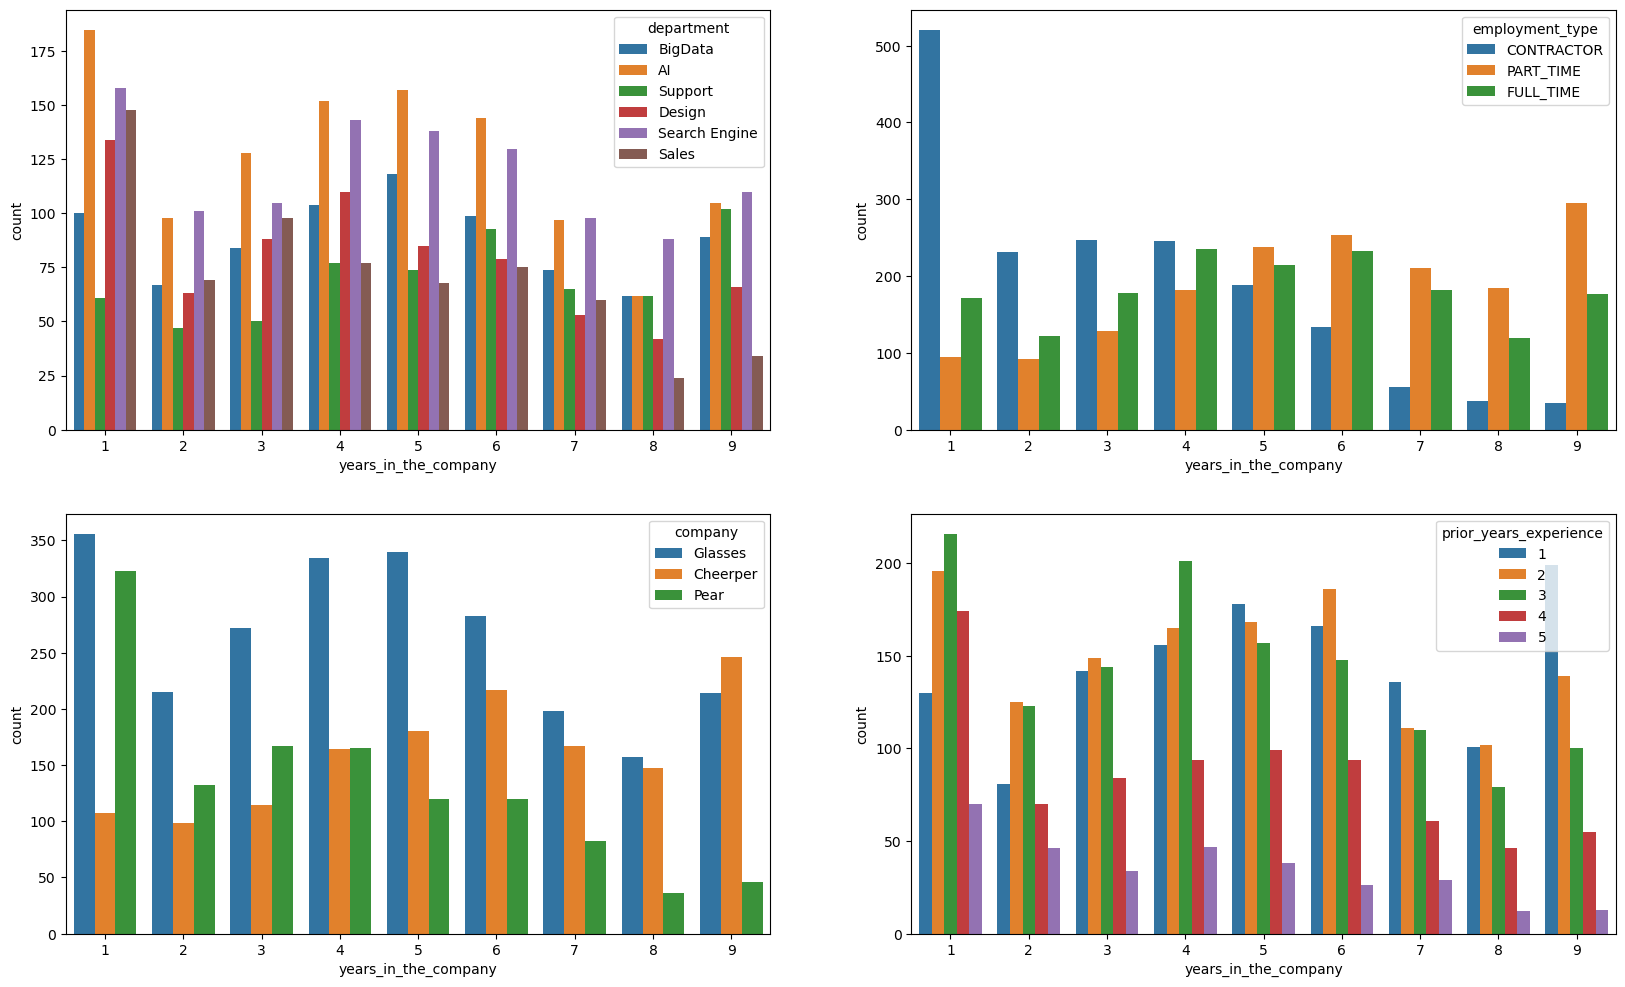

In [32]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.countplot(data=df, x="years_in_the_company",hue='department')
plt.subplot(2,2,2)
sns.countplot(data=df, x="years_in_the_company",hue='employment_type')
plt.subplot(2,2,3)
sns.countplot(data=df, x="years_in_the_company",hue='company')
plt.subplot(2,2,4)
sns.countplot(data=df, x="years_in_the_company",hue='prior_years_experience')